In [1]:
#importing necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t', quoting=3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df.shape

(1000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df["Liked"].value_counts()

0    500
1    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

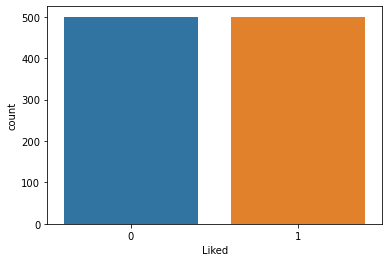

In [6]:
sns.countplot(df.Liked)

In [7]:
# Cleaning the reviews
corpus=[]

for i in range(0,len(df)):
  
    # Cleaning special character from the reviews
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    
    # Converting the entire review into lower case
    review=review.lower()
    
    # Tokenizing the review by words
    review_words=review.split()
    
    # Removing the stop words
    review_words=[word for word in review_words if not word in set(stopwords.words("english"))]
    
    # Stemming the words
    Wordnet= WordNetLemmatizer()
    review = [Wordnet.lemmatize(word) for word in review_words]

    # Joining the stemmed words    
    review=' '.join(review)
    
    # Creating a corpus
    corpus.append(review)
    

In [8]:
corpus[0:10]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch']

In [9]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 79.0%
Precision score is: 0.75
Recall score is: 0.84


In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[79, 27],
       [15, 79]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

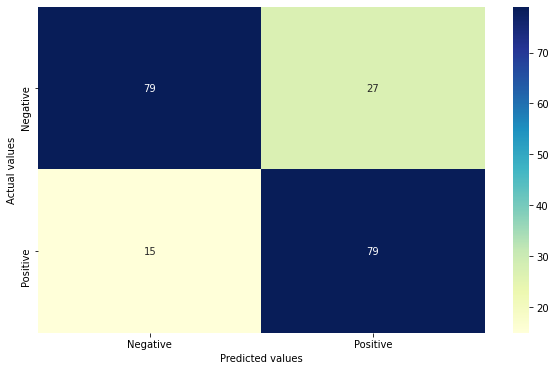

In [15]:
# Plotting the confusion matrix
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [16]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 76.5%
Accuracy score for alpha=0.2 is: 77.0%
Accuracy score for alpha=0.3 is: 77.0%
Accuracy score for alpha=0.4 is: 77.5%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 78.5%
Accuracy score for alpha=0.8 is: 78.5%
Accuracy score for alpha=0.9 is: 78.5%
Accuracy score for alpha=1.0 is: 79.0%
--------------------------------------------
The best accuracy is 79.0% with alpha value as 1.0


In [17]:
classifier = MultinomialNB(alpha=0.5)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [18]:
#creating a function
def predict_sentiment(sample_review):
  sample_review = re.sub('[^a-zA-Z]',' ',sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  
  Wordnet= WordNetLemmatizer()
  final_review = [Wordnet.lemmatize(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [19]:
# Predicting values
sample_review = 'The food is really delicious here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [20]:
# Predicting values
sample_review = 'Would give it a zero if I could. Hostess stand was rude. Bartender was rude. Come here if you want attitude'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [21]:
# Predicting values
sample_review = 'food was amazing but not satisfied with services '

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [22]:
# Predicting values
sample_review = '''Its my first visit in this restaurants and I loved the way they serve the food to me but 
                food was not tasty but i loved there cold coffee . 
                the staff members were also quiet good at their work . 
                this place was soo noisy and it was very difficult for me to get quiet place don't.'''

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


# The End